##### The University of Melbourne, School of Computing and Information Systems

**COMP30027 Machine Learning, 2022 Semester 1**

---

# **Assignment 2:** Sentiment Classification of Tweets

---

## Analyzing the data

### 1. Impute the data from the `.csv` files

In [4]:
import pandas as pd

train_df = pd.read_csv("../data/Train.csv", sep=',')
test_df = pd.read_csv("../data/Test.csv", sep=',')

### 2. Look at the raw data's information

In [5]:
# get information about types in the training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21802 entries, 0 to 21801
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21802 non-null  int64 
 1   id          21802 non-null  int64 
 2   text        21802 non-null  object
 3   sentiment   21802 non-null  object
dtypes: int64(2), object(2)
memory usage: 681.4+ KB


In [6]:
# get information about types in the testing set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6099 entries, 0 to 6098
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6099 non-null   int64 
 1   text    6099 non-null   object
dtypes: int64(1), object(1)
memory usage: 95.4+ KB


In [7]:
# display the head of the training information
train_df.head()

,Unnamed: 0,id,text,sentiment
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive


In [8]:
# display the head of the testing information
test_df.head()

,id,text
0,802217876644052000,@loogunda @poroshenko putin abducted ukrainia...
1,802425296955682000,if putin wanted to intervene all he would hav...
2,805664502515662000,@hillbuzz @gaypatriot elsewhere in progland.....
3,639928670103015000,any females copping the gucci foamposites tom...
4,673824182287904000,"""in other news, had a great saturday on the t..."


In [9]:
# show a random sample from the training information
train_df.sample(5)

,Unnamed: 0,id,text,sentiment
21024,26899,641325381463736000,sm: sold out derby?: with days still to go bef...,neutral
14003,17964,638542234049245000,bitch sakura tryna tell my nigga the 5th bout...,negative
15550,19950,635427775172624000,"""wilt chamberlain claims to have slept with m...",neutral
21233,27175,641054622631616000,murray can't be happy with that tie-break esp....,negative
10707,13684,641042311904915000,#raw a friendly reminder to seth rollins from...,neutral


In [10]:
# show a random sample from the testing information
test_df.sample(5)

,id,text
2971,802378824910569000,trump on dealing with future george soros pro...
274,675043990694182000,i just read kim kardashian may have gestation...
235,802210935049886000,"@petestavros @megynkelly we all have ""persona..."
2774,623889920311099000,boko haram just hit maroua in the far north ...
205,801696003791474000,#israel is threatened by a more capable and d...


In [16]:
# summary information
print(f"Length of the training data: \t{len(train_df)}")
print(f"Length of the testing data: \t{len(test_df)}")

Length of the training data: 	21802
Length of the testing data: 	6099


### 3. Analyze the distribution of the sentiments

In [17]:
from collections import Counter

# Sentiment options and counts
print(Counter(train_df[['sentiment']].values[:, 0]))

Counter({'neutral': 12659, 'positive': 5428, 'negative': 3715})


<AxesSubplot:title={'center':'Distribution over the sentiments'}, xlabel='Sentiment', ylabel='Frequency'>

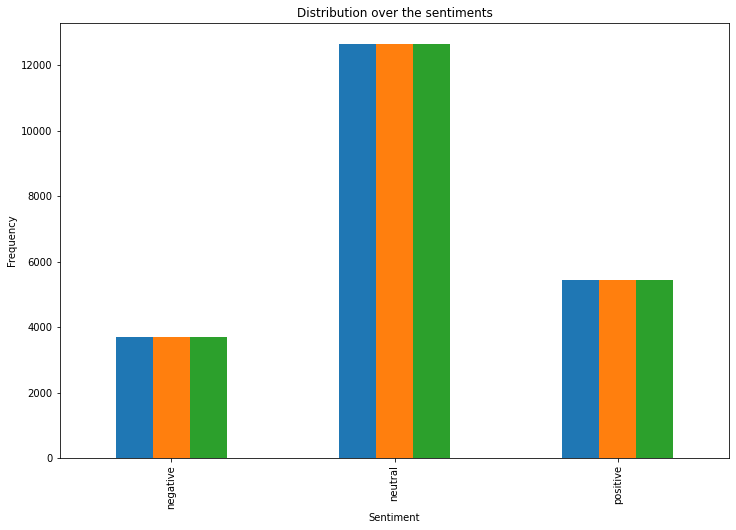

In [15]:
import matplotlib.pyplot as plt

# Distribution of the data between the sentiments
train_df.groupby('sentiment').count().plot(kind='bar',
                                           title='Distribution over the sentiments', 
                                           legend=False,
                                           xlabel='Sentiment', 
                                           ylabel='Frequency',
                                           figsize=(12,8))

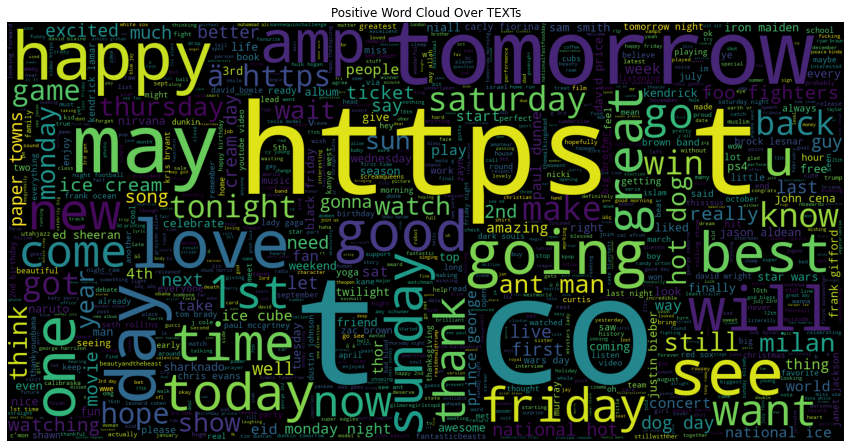

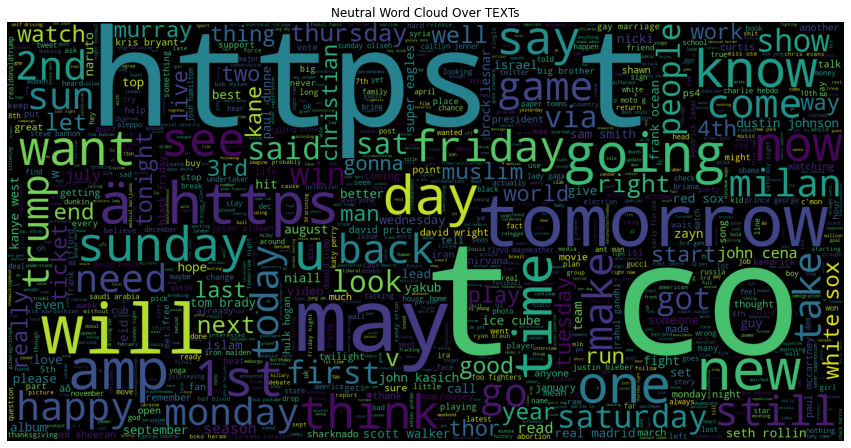

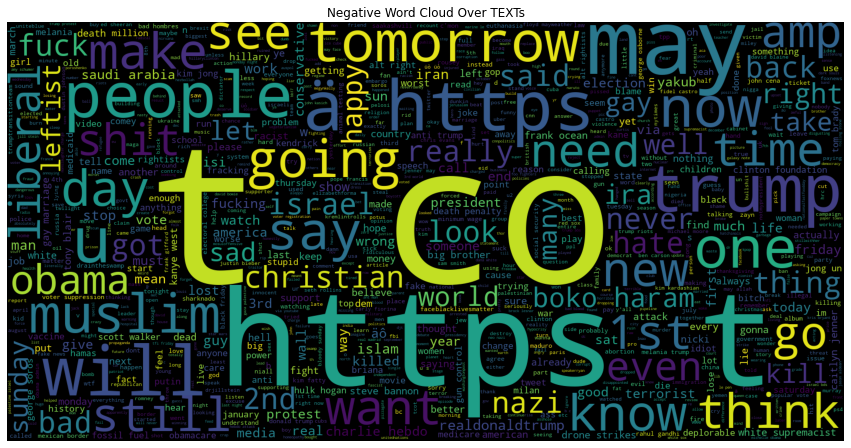

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# determine the most popular words per sentiment using wordcloud
def wordcloud_per_sentiment(text_index = 'text'):
    train_pos = train_df[train_df['sentiment'] == 'positive']
    train_neu = train_df[train_df['sentiment'] == 'neutral']
    train_neg = train_df[train_df['sentiment'] == 'negative']

    wc_pos = WordCloud(max_words = 1000, width=1600, height=800
        ).generate(" ".join(train_pos['text']))
    plt.figure(figsize= (15, 15), frameon=False)
    plt.axis('off')
    plt.title(f"Positive Word Cloud Over {text_index.upper()}s")
    plt.imshow(wc_pos)
    plt.savefig(f"../report/img/wc_positive_{text_index}.png", bbox_inches='tight')

    wc_neu = WordCloud(max_words = 1000, width=1600, height=800
        ).generate(" ".join(train_neu['text']))
    plt.figure(figsize= (15, 15), frameon=False)
    plt.axis('off')
    plt.title(f"Neutral Word Cloud Over {text_index.upper()}s")
    plt.imshow(wc_neu)
    plt.savefig(f"../report/img/wc_neutral_{text_index}.png", bbox_inches='tight')

    wc_neg = WordCloud(max_words = 1000, width=1600, height=800
        ).generate(" ".join(train_neg['text']))
    plt.figure(figsize= (15, 15), frameon=False)
    plt.axis('off')
    plt.title(f"Negative Word Cloud Over {text_index.upper()}s")
    plt.imshow(wc_neg)
    plt.savefig(f"../report/img/wc_negative_{text_index}.png", bbox_inches='tight')

# run the word cloud on the unprocessed data
wordcloud_per_sentiment()

## Preprocessing the data

See `feature_extraction.py` for the functions used to extract features and clean the tweets.

### 1. Determining stop_words

The stop-word list is developed by iteratively plotting the above word clouds and choosing terms which clearly appear frequently in each sentiment, then applying cleaning to the tweets.

In [19]:
from feature_extraction import clean_tweet

# perform cleaning on the data (just to show functionality)
train_df['text_clean'] = train_df['text'].apply(lambda t: clean_tweet(t))
test_df['text_clean'] = test_df['text'].apply(lambda t: clean_tweet(t))

# extract the word lists from the cleaned tweets
train_df['word_list_clean'] = train_df['text_clean'].apply(lambda t: t.split(' '))
test_df['word_list_clean'] = test_df['text_clean'].apply(lambda t: t.split(' '))

In [20]:
# display the head of the training information
train_df.head()

,Unnamed: 0,id,text,sentiment,text_clean,word_list_clean
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral,doctors hit campaign trail as race to medical ...,"[doctors, hit, campaign, trail, as, race, to, ..."
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive,is anybody going to the radio station tomorrow...,"[is, anybody, going, to, the, radio, station, ..."
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral,i just found out naruto didn t become the th h...,"[i, just, found, out, naruto, didn, t, become,..."
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral,prince george reservist who died saturday just...,"[prince, george, reservist, who, died, saturda..."
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive,season in the sun versi nirvana rancak gak slo...,"[season, in, the, sun, versi, nirvana, rancak,..."


In [ ]:
# display the head of the testing information
test_df.head()

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
from collections import Counter
import string

# plotting
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


### Read both the `.csv` files
Extract the sentiments and tweets as well

In [2]:
train_df = pd.read_csv("../data/Train.csv", sep=',')
test_df = pd.read_csv("../data/Test.csv", sep=',')


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/Train.csv'

### Explore and analyze the data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21802 entries, 0 to 21801
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21802 non-null  int64 
 1   id          21802 non-null  int64 
 2   text        21802 non-null  object
 3   sentiment   21802 non-null  object
dtypes: int64(2), object(2)
memory usage: 681.4+ KB


In [ ]:
train_df.head()

,Unnamed: 0,id,text,sentiment
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive


In [ ]:
train_df.sample(5)

,Unnamed: 0,id,text,sentiment
8328,10651,640440582595178000,gucci trousers jiva untimidness november actu...,neutral
8568,10950,638007301509505000,"""nyt editorial claims john kasich might be ap...",neutral
4332,5541,637461445811179000,"""katy perry's last friday night speaks to me....",positive
1384,1778,641242351164387000,msnbc: the nfl season kicks off thursday nigh...,neutral
7881,10062,802361909852983000,label scan of bob dylan's can you please craw...,neutral


In [ ]:
# column names
print(train_df.columns)

# data lengths
print(f"Length of training data: \t{len(train_df)}")
print(f"Length of testing data: \t{len(test_df)}")

# shape of the data set
print(train_df.shape)

# Sentiment options and counts
print(Counter(train_df[['sentiment']].values[:, 0]))

Index(['Unnamed: 0', 'id', 'text', 'sentiment'], dtype='object')
Length of training data: 	21802
Length of testing data: 	6099
(21802, 4)
Counter({'neutral': 12659, 'positive': 5428, 'negative': 3715})


<AxesSubplot:title={'center':'Distribution over the sentiments'}, xlabel='Sentiment', ylabel='Frequency'>

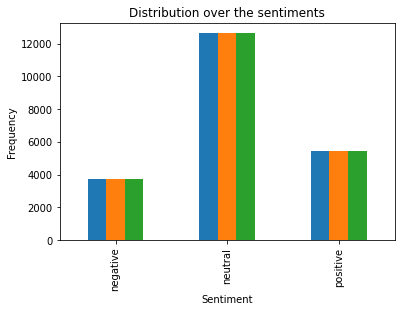

In [ ]:
# Distribution of the data between the sentiments
train_df.groupby('sentiment').count().plot(kind='bar',
                                           title='Distribution over the sentiments', legend=False,
                                           xlabel='Sentiment', ylabel='Frequency')


### Pre-process the data
The tweets raw are full of noise.
This can be reduced via removal of punctuation, tokenization, stemming and/or lemmatization.

In [ ]:
train_data = train_df[['text', 'sentiment']].copy()
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail as race to medical...,neutral
1,is anybody going to the radio station tomorro...,positive
2,i just found out naruto didn't become the 5th...,neutral
3,"""prince george reservist who died saturday ju...",neutral
4,season in the sun versi nirvana rancak gak..s...,positive
5,if i didnt have you i'd never see the sun. #m...,positive
6,this is cute. #thisisus @nbcthisisus https://...,positive
7,today is the international day for the elimin...,neutral
8,"""in his first game back since april 14, david...",neutral
9,josh hamilton flies out to center... we are g...,neutral


In [ ]:
# clean and remove urls
def remove_links(text):
    return re.sub(r"https?://t.co/\w*", " ", text)
train_data['text'] = train_data['text'].apply(lambda text: remove_links(text))
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail as race to medical...,neutral
1,is anybody going to the radio station tomorro...,positive
2,i just found out naruto didn't become the 5th...,neutral
3,"""prince george reservist who died saturday ju...",neutral
4,season in the sun versi nirvana rancak gak..s...,positive
5,if i didnt have you i'd never see the sun. #m...,positive
6,this is cute. #thisisus @nbcthisisus,positive
7,today is the international day for the elimin...,neutral
8,"""in his first game back since april 14, david...",neutral
9,josh hamilton flies out to center... we are g...,neutral


In [ ]:
# clean and remove non alphanumeric characters
def remove_nonwords(text):
    return re.sub(r"\W", " ", text)
train_data['text'] = train_data['text'].apply(lambda text: remove_nonwords(text))
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail as race to medical...,neutral
1,is anybody going to the radio station tomorro...,positive
2,i just found out naruto didn t become the 5th...,neutral
3,prince george reservist who died saturday ju...,neutral
4,season in the sun versi nirvana rancak gak s...,positive
5,if i didnt have you i d never see the sun m...,positive
6,this is cute thisisus nbcthisisus,positive
7,today is the international day for the elimin...,neutral
8,in his first game back since april 14 david...,neutral
9,josh hamilton flies out to center we are g...,neutral


In [ ]:
# remove numeric values
def remove_numeric(text):
    return re.sub(r"\d", " ", text)
train_data['text'] = train_data['text'].apply(lambda text: remove_numeric(text))
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail as race to medical...,neutral
1,is anybody going to the radio station tomorro...,positive
2,i just found out naruto didn t become the th...,neutral
3,prince george reservist who died saturday ju...,neutral
4,season in the sun versi nirvana rancak gak s...,positive
5,if i didnt have you i d never see the sun m...,positive
6,this is cute thisisus nbcthisisus,positive
7,today is the international day for the elimin...,neutral
8,in his first game back since april david...,neutral
9,josh hamilton flies out to center we are g...,neutral


In [ ]:
# remove non-alphabetic values
def remove_nonalphabetic(text):
    return re.sub(r"[^a-z]+", " ", text)
train_data['text'] = train_data['text'].apply(lambda text: remove_nonalphabetic(text))
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail as race to medical...,neutral
1,is anybody going to the radio station tomorro...,positive
2,i just found out naruto didn t become the th ...,neutral
3,prince george reservist who died saturday jus...,neutral
4,season in the sun versi nirvana rancak gak sl...,positive
5,if i didnt have you i d never see the sun mtv...,positive
6,this is cute thisisus nbcthisisus,positive
7,today is the international day for the elimin...,neutral
8,in his first game back since april david wrig...,neutral
9,josh hamilton flies out to center we are goin...,neutral


In [ ]:
# remove directly repeated values (OPTIONAL)
def remove_repeated(text):
    return re.sub(r"(.)\1+", r"\1", text)
# train_data['text'] = train_data['text'].apply(lambda text: remove_repeated(text))
# train_data.head(20)

In [ ]:
# define the stop_words (first by guessing a few, 
# then by repeatedly finding the most common words below)
alphabet = 'abcdefghijklmnopqrstuvwxyz'
stop_words = [
    'the', 'th', 'this', 'to', 'you', 'and', 'in', 'is', 'will', 'that', 'on', 
    'of', 'just', 'it', 'for', 'be', 'at', 'about', 'going', 'yours', 'youre', 
    'your', 'youve', 'im', 'yet', 'yes', 'theres', 'about', 'he', 'her', 'she', 
    'him', 'as', 'out', 'didn', 'who', 'whom', 'we', 'we', 're', 'see', 'st', 
    'll', 'time', 'all', 'my', 'if'
    ] + [c for c in alphabet]

# clean the texts of stop words
def remove_stopwords(text):
    re_stop_words = r"(?<=\W)" + r"(?=\W)|(?<=\W)".join(stop_words) + r"(?=\W)"
    return re.sub(re_stop_words, " ", text)
train_data['text'] = train_data['text'].apply(lambda text: remove_stopwords(text))
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail race medical c...,neutral
1,anybody radio station tomorrow sh...,positive
2,found naruto become hokage,neutral
3,prince george reservist died saturday wan...,neutral
4,season sun versi nirvana rancak gak slow ...,positive
5,didnt have never sun mtvstars l...,positive
6,cute thisisus nbcthisisus,positive
7,today international day elimination ...,neutral
8,his first game back since april david wrigh...,neutral
9,josh hamilton flies center are bo...,neutral


In [ ]:
# remove repeated space characters
def reduce_spacing(text):
    return re.sub(r"\s+", " ", text)
train_data['text'] = train_data['text'].apply(lambda text: remove_stopwords(text))
train_data.head(20)

,text,sentiment
0,doctors hit campaign trail race medical c...,neutral
1,anybody radio station tomorrow sh...,positive
2,found naruto become hokage,neutral
3,prince george reservist died saturday wan...,neutral
4,season sun versi nirvana rancak gak slow ...,positive
5,didnt have never sun mtvstars l...,positive
6,cute thisisus nbcthisisus,positive
7,today international day elimination ...,neutral
8,his first game back since april david wrigh...,neutral
9,josh hamilton flies center are bo...,neutral


### Determine the most popular words per sentiment using `wordcloud`

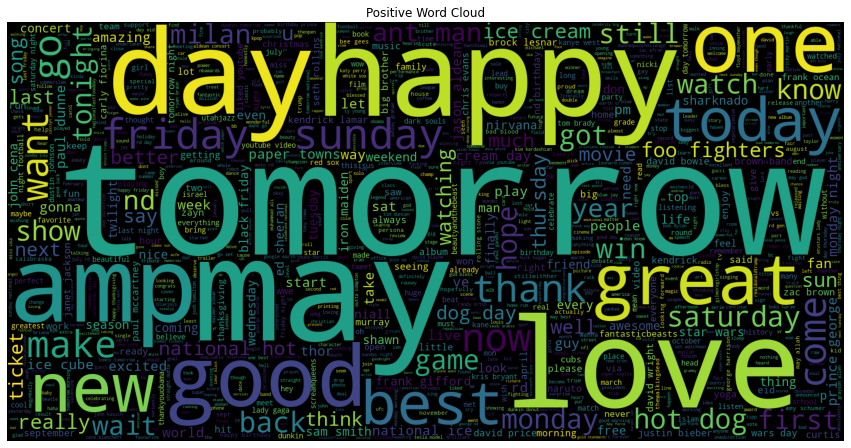

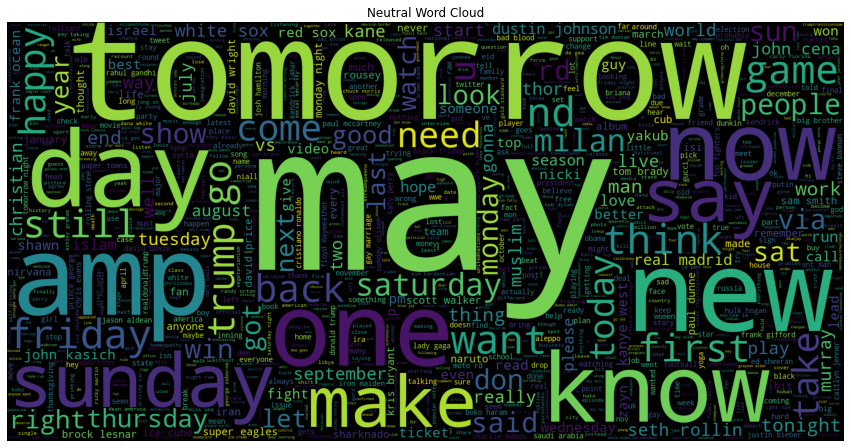

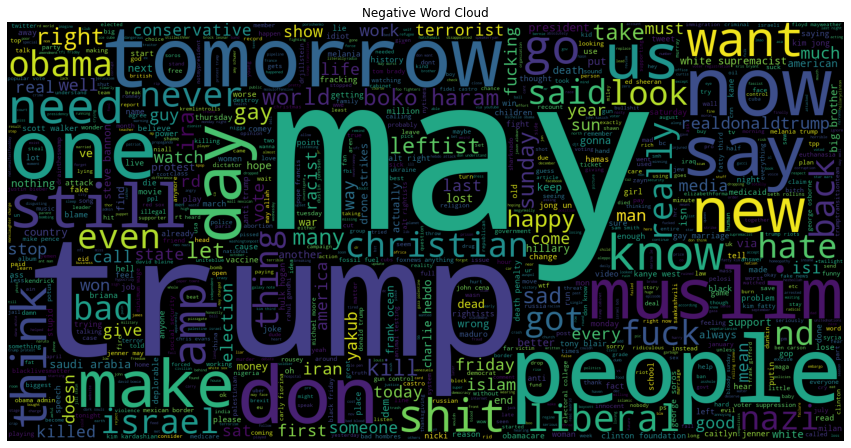

In [ ]:
train_pos = train_data[train_data['sentiment'] == 'positive']
train_neu = train_data[train_data['sentiment'] == 'neutral']
train_neg = train_data[train_data['sentiment'] == 'negative']

wc_pos = WordCloud(max_words = 1000, width=1600, height=800
    ).generate(" ".join(train_pos['text']))
plt.figure(figsize= (15, 15), frameon=False)
plt.axis('off')
plt.title("Positive Word Cloud")
plt.imshow(wc_pos)
plt.savefig("../report/img/wc_positive.png", bbox_inches='tight')

wc_neu = WordCloud(max_words = 1000, width=1600, height=800
    ).generate(" ".join(train_neu['text']))
plt.figure(figsize= (15, 15), frameon=False)
plt.axis('off')
plt.title("Neutral Word Cloud")
plt.imshow(wc_neu)
plt.savefig("../report/img/wc_neutral.png", bbox_inches='tight')

wc_neg = WordCloud(max_words = 1000, width=1600, height=800
    ).generate(" ".join(train_neg['text']))
plt.figure(figsize= (15, 15), frameon=False)
plt.axis('off')
plt.title("Negative Word Cloud")
plt.imshow(wc_neg)
plt.savefig("../report/img/wc_negative.png", bbox_inches='tight')

### Vectorize the data using TF-IDF

In [ ]:
# create the vectorizer
vectorizer = TfidfVectorizer(max_features=4000)

# apply it to the dataset
vectorizer.fit(train_data['text'])
X = vectorizer.transform(train_data['text'])
y = train_data['sentiment']

### Create a method to evaluate the models created

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def evaluate(model, X, y, cv = 5, display = True):

    # Create the output list for evaluations
    output = []

    if display:
        print(type(model))

    for i in range(cv):
        # create the dictionary of summaries
        cv_dict = dict()
        
        # extract the split
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size= 1 / cv, random_state=101)

        # fit the data and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # generate the evaluation statistics
        c_report = classification_report(y_test, y_pred)

        # display the confusion matrix
        c_matrix = confusion_matrix(y_test, y_pred)

        # append all of this to the dictionary
        cv_dict['data'] = (X_train, X_test, y_train, y_test, y_pred)
        cv_dict['evaluation'] = c_report
        cv_dict['confusion-matrix'] = c_matrix
        output.append(cv_dict)

        # display the stuff if needed
        if display:
            print(c_report)
            plt.figure(figsize=(15, 15))
            ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

    return output


## Testing Different Models

In [ ]:
# import useful models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression

<class 'sklearn.svm._classes.LinearSVC'>
              precision    recall  f1-score   support

    negative       0.54      0.31      0.39      1871
     neutral       0.67      0.83      0.74      6312
    positive       0.63      0.47      0.54      2718

    accuracy                           0.65     10901
   macro avg       0.61      0.54      0.56     10901
weighted avg       0.64      0.65      0.63     10901

              precision    recall  f1-score   support

    negative       0.54      0.31      0.39      1871
     neutral       0.67      0.83      0.74      6312
    positive       0.63      0.47      0.54      2718

    accuracy                           0.65     10901
   macro avg       0.61      0.54      0.56     10901
weighted avg       0.64      0.65      0.63     10901

<class 'sklearn.naive_bayes.BernoulliNB'>
              precision    recall  f1-score   support

    negative       0.64      0.02      0.04      1871
     neutral       0.60      0.98      0.74   

<Figure size 1080x1080 with 0 Axes>

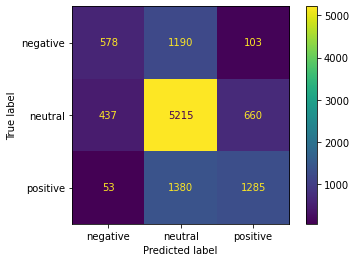

<Figure size 1080x1080 with 0 Axes>

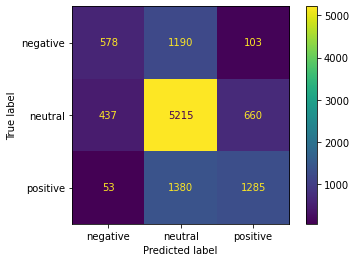

<Figure size 1080x1080 with 0 Axes>

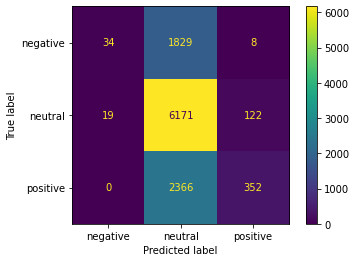

<Figure size 1080x1080 with 0 Axes>

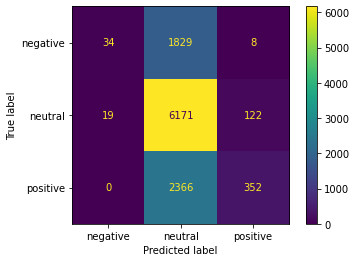

<Figure size 1080x1080 with 0 Axes>

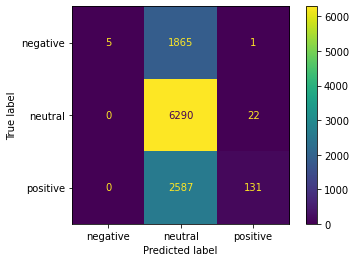

<Figure size 1080x1080 with 0 Axes>

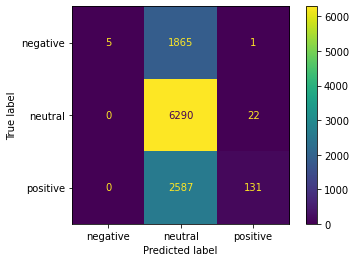

<Figure size 1080x1080 with 0 Axes>

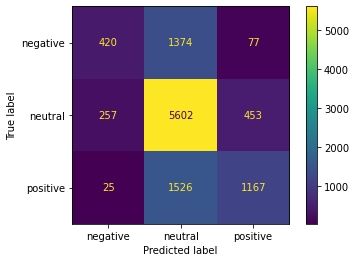

<Figure size 1080x1080 with 0 Axes>

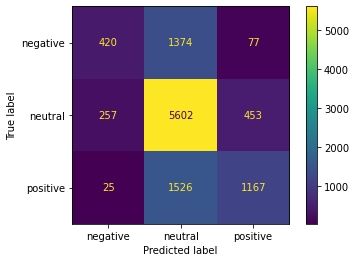

In [ ]:
# devise a list of models to test
models = [LinearSVC(), BernoulliNB(), MultinomialNB(), LogisticRegression(C=2, n_jobs=-1)]

for m in models:
    evaluate(m, X, y, cv=2)